### A Hierarchical clustering method works via grouping data into a tree of clusters. Hierarchical clustering begins by treating every data point as a separate cluster. Then, it repeatedly executes the subsequent steps:

### 1) Identify the 2 clusters which can be closest together, and
### 2) Merge the 2 maximum comparable clusters. We need to continue these steps until all the clusters are merged together.

### In Hierarchical Clustering, the aim is to produce a hierarchical series of nested clusters. A diagram called Dendrogram

### there are two aapproches which are defined below
## 1) Agglomerative: 
#### It is a bottom-up approach, in which the algo starts with taking all data points as single clusters and merging them untill one cluster is left
## 2) Divisive:
### It is opposite top_down approach to the above.

### the clusters are made according to the distances between the data points and are then linked to each other for the bot approches as defined earlier abobve
### types of linkage methods are defined below
## 1) Single linkage:
#### The data points that are at the minimum distance are linked together to form a cluster.
## 2) Complete linkage:
#### The data points that are at the maximum distance are linked together to form a cluster.
## 3) Average linkage:
#### Average distance is calculated and then the data points are linked.
## 4) Centroid linkage:
#### Center of the data point is taken for linking purpose.

# Agglomerative

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# load the dataset
d_set=pd.read_csv("iris.csv")
d_set.drop(columns=['species'], axis=1, inplace=True)
d_set.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Since, the agglomerative clustering works on the linearly separable data, therefore, checking graphically as follows

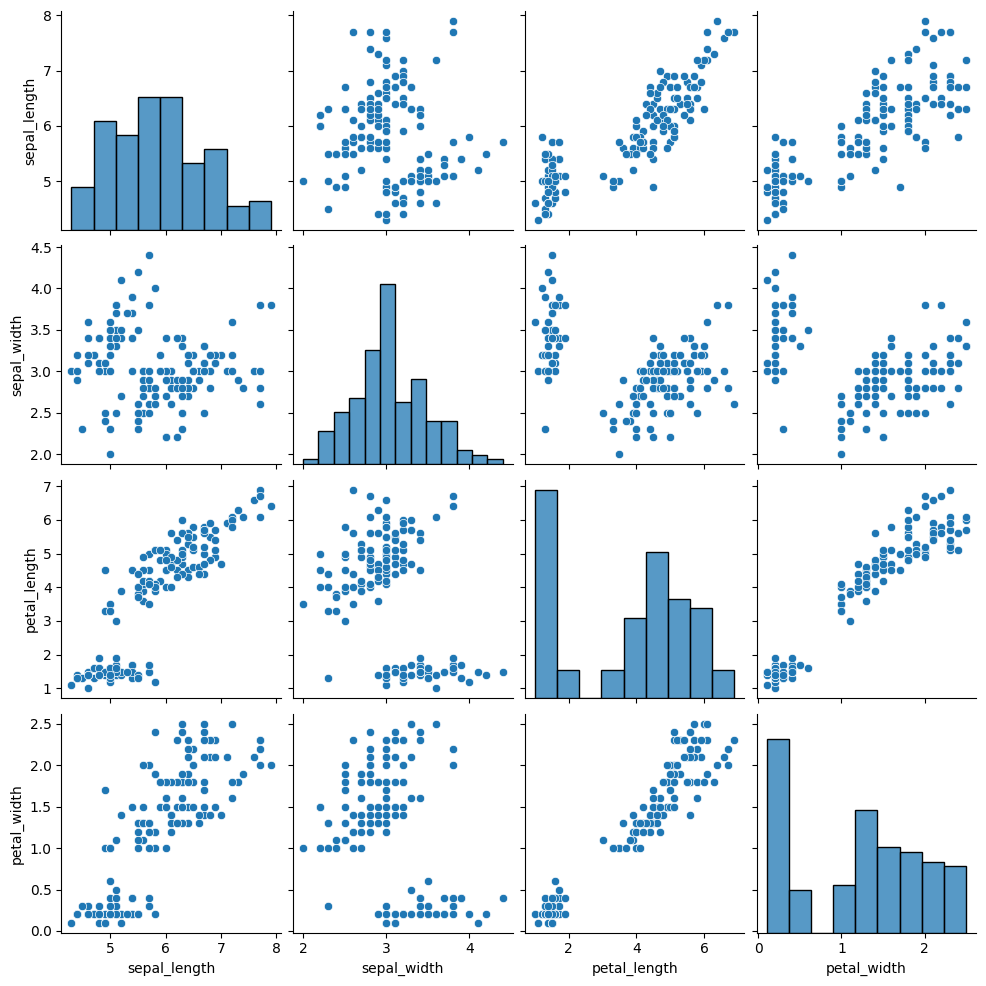

In [8]:
sns.pairplot(data=d_set)
plt.show()

### result: from the above graph it can be seen that the data is almost linearly separable and hence we can apply agglomerative clustering technique here

### Now we need to plot a dedrogram that helps us to identify the number of clusters used in the dataset and then we will make use of those number of clusters in our training phase
### To plot a drendogram we need to have python's scipy library. to install it open cmd and run --> pip install SciPy

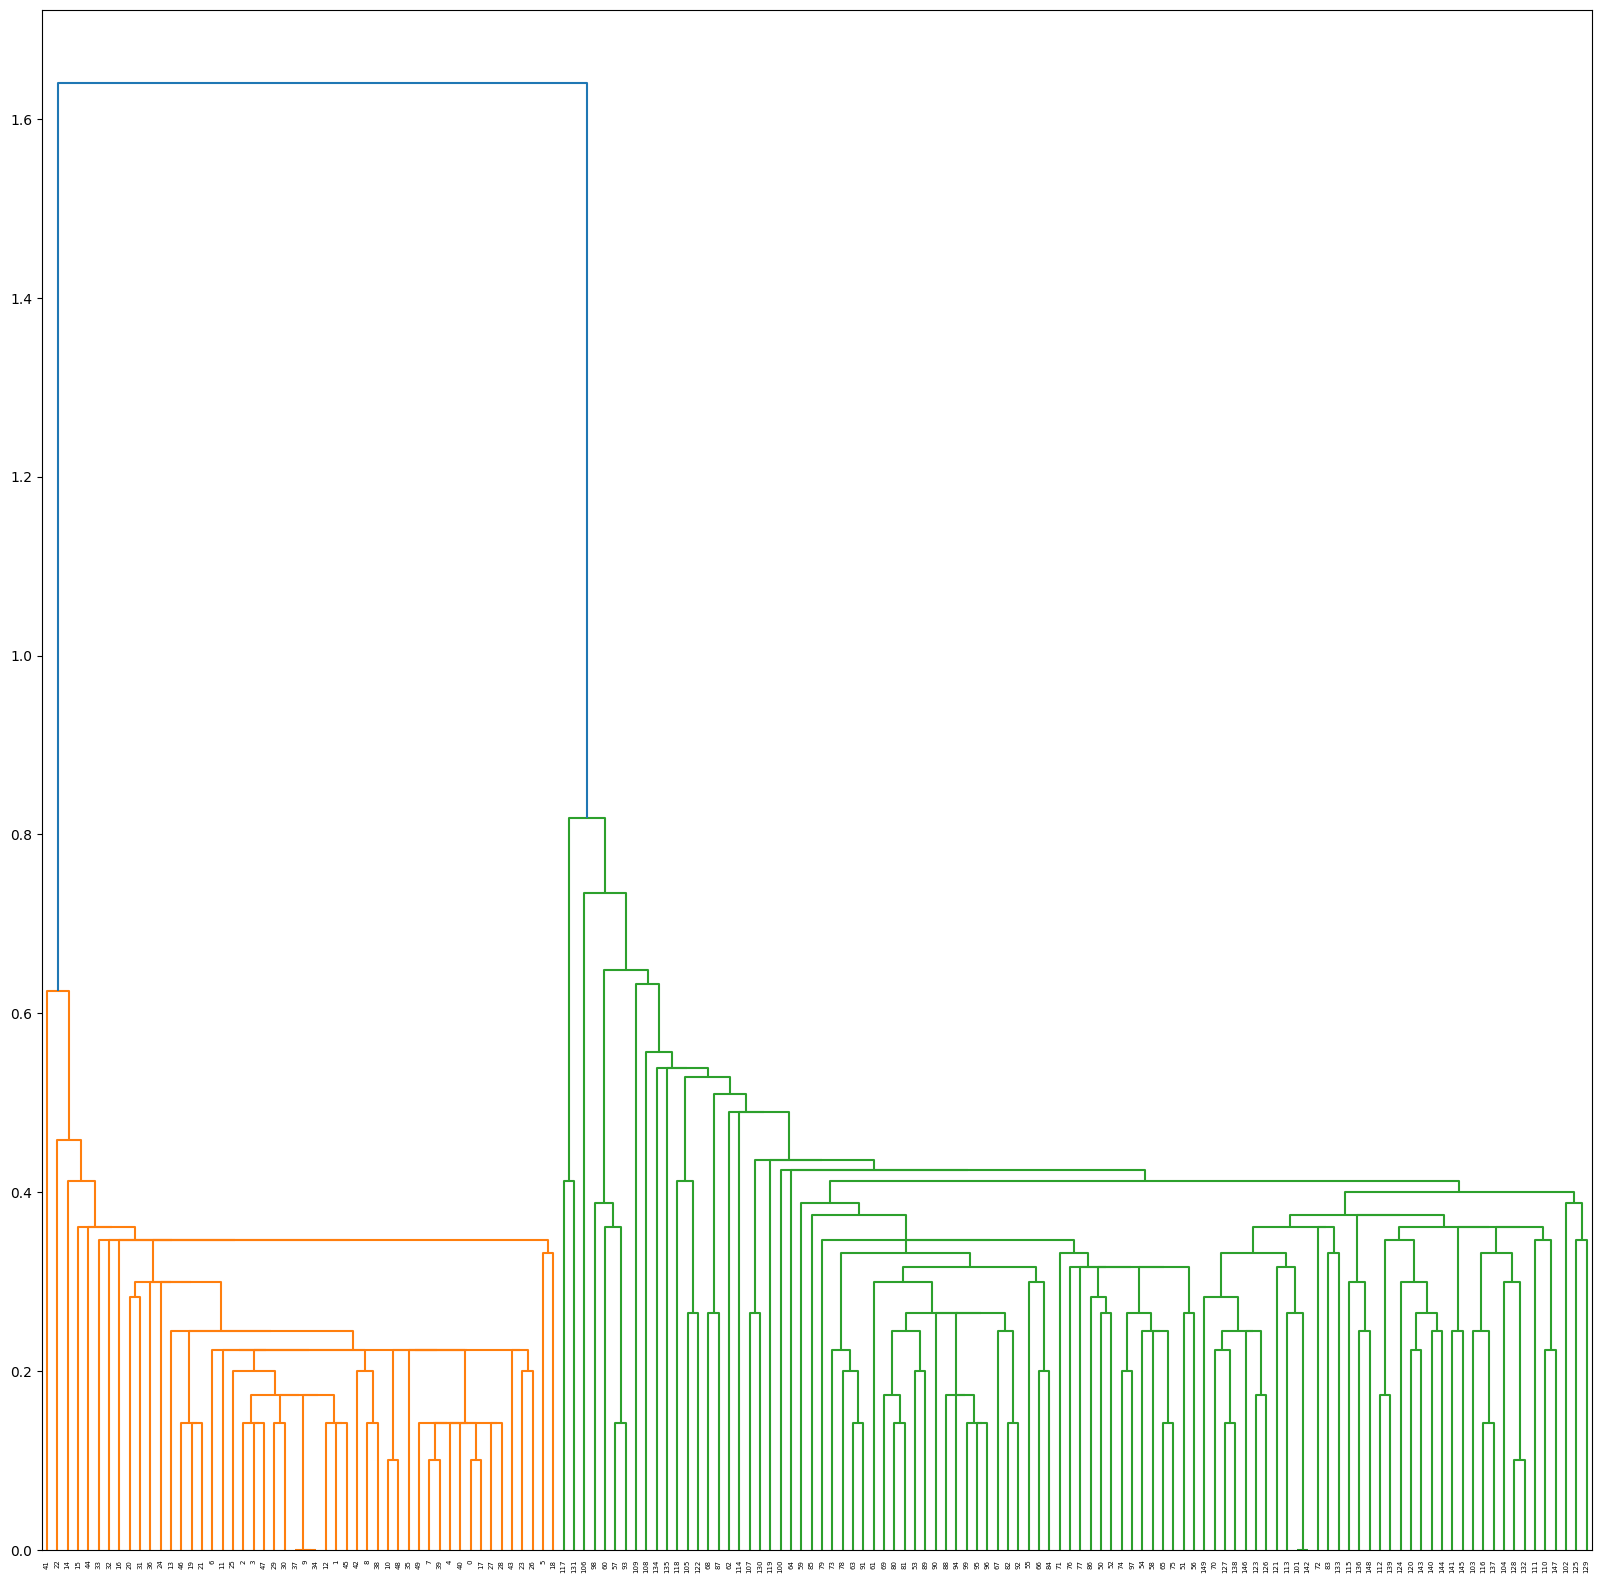

In [13]:
# import scipy
import scipy.cluster.hierarchy as sc

# plot the dendrogram
plt.figure(figsize=(20,20))
sc.dendrogram(sc.linkage(d_set, method='single', metric='euclidean'))
plt.show()

### result: as it can be seen that there is a large line blue in color without any cut. it is the line that will give us number of clusters. so if we cut this line from the center then there will be two clusters one on rigth lline and other on the left side of the line
### therefore, number of clusters will be 2

In [14]:
# model
from sklearn.cluster import AgglomerativeClustering

ac=AgglomerativeClustering(n_clusters=2, linkage='single') # single linkage is used here

# fit the dataset
ac.fit(d_set)

AgglomerativeClustering(linkage='single')

In [17]:
# predictions
d_set['predicted']=ac.fit_predict(d_set)
d_set.head()

,sepal_length,sepal_width,petal_length,petal_width,predicted
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


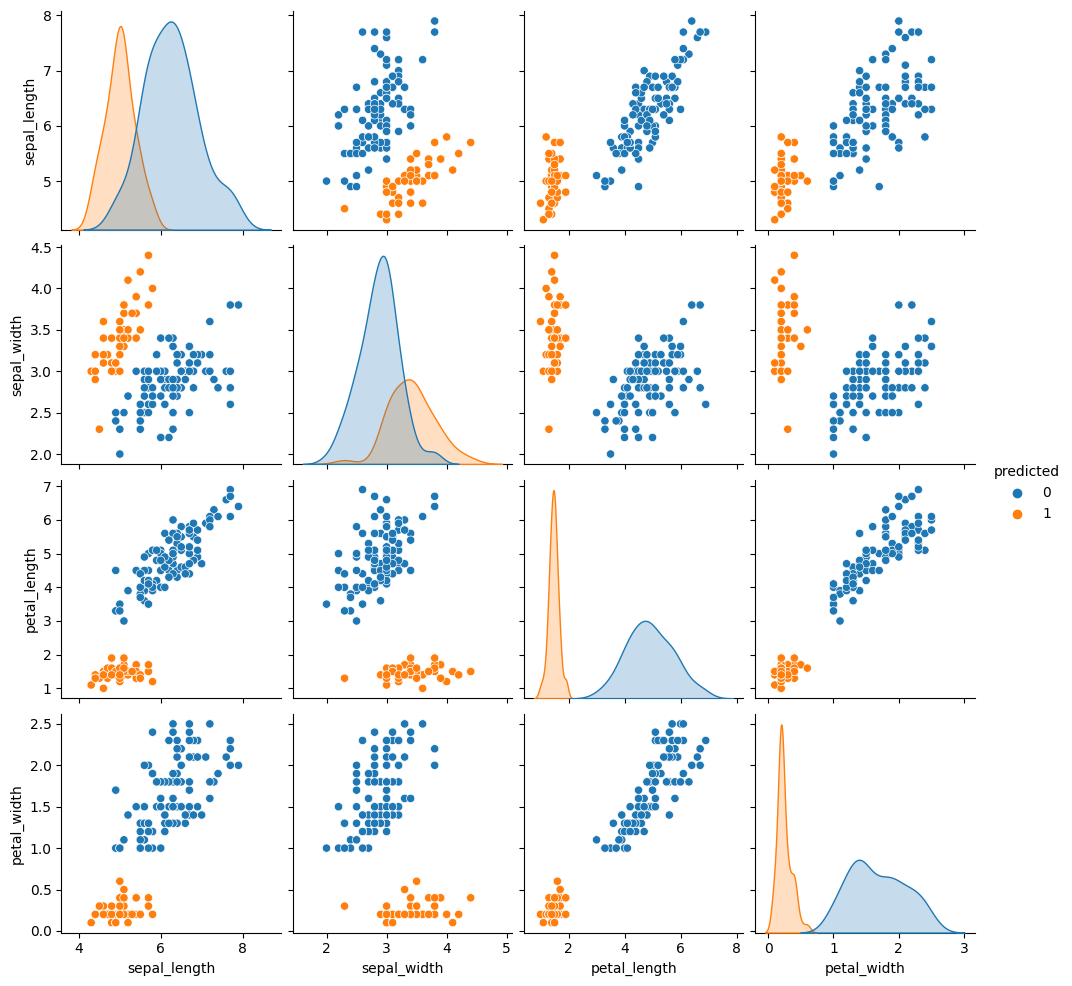

In [19]:
# now check graphically the 
sns.pairplot(data=d_set, hue='predicted')
plt.show()

### result: from the above graph it can clearly be seen that there are total 2 number of clusters are formed